![dth99](images/fe1.png)

-
![dth99](images/fe2.png)

-
![dth99](images/fe3.png)


![dth99](images/fe4.png)

-
![dth99](images/fe5.png)

-
![dth99](images/fe6.png)

-
![dth99](images/fe7.png)

- 
![dth99](images/fe8.png)

-
![dth99](images/fe9.png)
-
![dth99](images/fe10.png)
-
![dth99](images/fe11.png)

- important
![dth99](images/fe12.png)

- most important
![dth99](images/fe13.png)





# Underfitting and Overfitting


![dth99](images/fe14.png)
-
![dth99](images/fe15.png)

-
![dth99](images/fe16.png)




# Diabetes Predication using multiple features

In [3]:
# Importing basic pacages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
#from Subprocess import check_output
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [4]:
data =pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# statistical  aspect on dataset

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# no data is missing

In [10]:
# prepocessing -checking for NaN values

data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

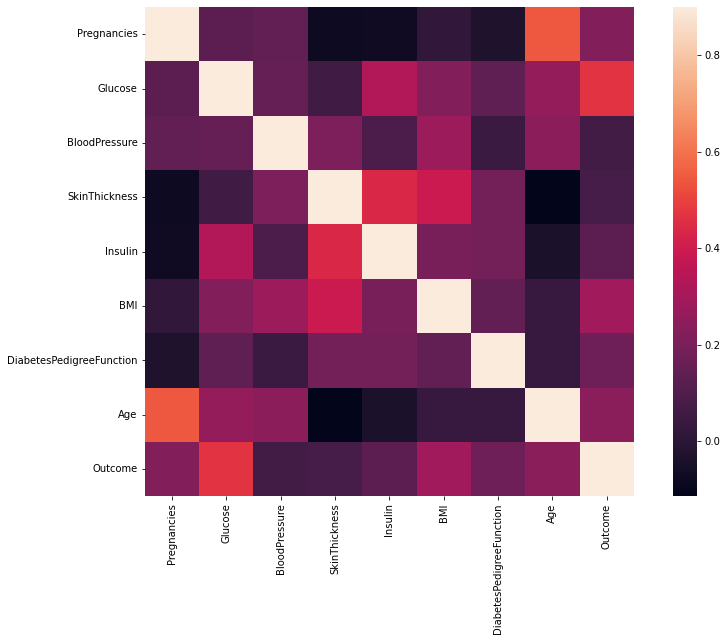

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [12]:
# understanding  correlation between the labes

#correlation

correlation_metrics= data.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, vmax=.9,square=True) #annot =value
plt.show()
print(correlation_metrics)

#### from above data, we can seee glucose has almost 0.4666 (5) value.
#### there is high chance person will have diabetes if glucose is high



In [13]:
# Number of people with no diabetes

In [16]:
No_sugar=0
result = data['Outcome']

for i in range(len(result)):
    # print()
    if result[i]==0:
        No_sugar=No_sugar+1
print(No_sugar)

500


In [ ]:
# Number of people with Diabetes

In [17]:
Sugar=0
for i in range(len(result)):
    if result[i]==1:
        Sugar=Sugar+1
print(Sugar)

268


In [ ]:
# printing count plot with Seaborn

Text(0.5, 1.0, 'No Diabetes vs Diabetes')

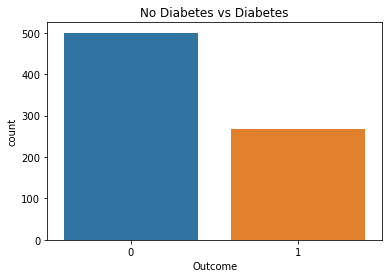

In [20]:
## creating count plot with title using seaborn

sns.countplot(x=data.Outcome)
plt.title("No Diabetes vs Diabetes")

In [21]:
# Splitting the training and testing dataset

In [23]:
x = data.drop(['Outcome'],axis=1) # drop the target variable
y= data['Outcome']

xtrain, xtest, ytrain, ytest  = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
# Using Logistic Regression

In [24]:
L = LogisticRegression()
L.fit(xtrain,ytrain)

C:\Users\deep9\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Performing predictions

In [25]:
y_pred=L.predict(xtest)

In [ ]:
# Confustion Matrix

In [26]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[78 21]
 [18 37]]


In [ ]:
# Final accuracy score

In [28]:
accuracy= L.score(xtest,ytest)

print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  74.67532467532467 %
